# Aayushi Nagbhidkar
# IoT and Computer Vision Intern at Sparks Foundation
# Batch: March 21


# Topic: Object Detection in Images and Videos 

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')
        #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 000002B99E9DB1B0>

# read an image

In [9]:
img = cv2.imread('traffic1.jpg')

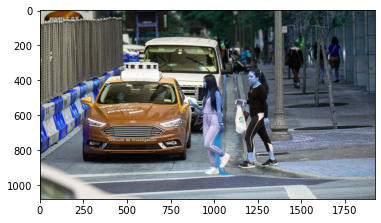

In [10]:
plt.imshow(img)

In [11]:
classIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [12]:
print(classIndex)

[[3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [8]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255, 0, 0), 2 )
    cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness = 3 )

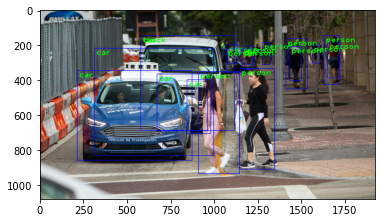

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video Demo

In [ ]:
cap = cv2.VideoCapture("traffic video.mp4")

if not cap.isOpened():
    cap=cv2.videocapture(0)
if not cap.isOpened():
    raise IOerror("cannot open video")

font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex , confidence , bbox = model.detect(frame,confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0) :
        for ClassInd , conf , boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness = 3 )
    cv2.imshow('Object Detection Tutorial ' , frame)

    if cv2.waitKey(2) & 0XFF == ord('q'):
        break

cap.realase()
cv2.destroyAllWindows()  

[[3]
 [8]
 [3]]
[[3]
 [8]]
[[3]
 [8]
 [8]
 [3]]
[[8]
 [3]
 [8]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [8]]
[[3]
 [8]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [8]]
[[3]
 [3]
 [8]
 [3]
 [8]]
[[3]
 [3]
 [8]
 [8]
 [3]
 [8]]
[[3]
 [3]
 [8]
 [8]
 [3]]
[[3]
 [3]
 [8]]
[[3]
 [8]
 [3]]
[[3]
 [8]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[8]
 [3]]
[[8]
 [3]
 [8]]
[[8]
 [3]]
()
()
[[3]]
[[8]]
[[8]]
[[8]]
[[8]
 [8]]
[[3]
 [8]]
[[3]
 [3]]
[[3]
 [8]]
[[8]
 [3]]
()
[[3]]
[[3]]
[[3]
 [3]]
[[3]
 [8]
 [3]]
[[3]
 [8]
 [3]]
[[3]
 [8]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [8]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [8]]
[[8]
 [3]
 [3]]
[[3]
 [3]]
[[8]
 [3]
 [3]]
[[3]
 [8]]
[[3]
 [3]
 [3]
 [8]]
[[3]
 [8]
 [3]
 [3]]
[[3]
 [8]
 [3]
 [3]
 